# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [25]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [26]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [27]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [28]:
df_train.shape

(15223, 52)

In [29]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [30]:
df_test.shape

(14910, 52)

In [199]:
df_train.head(50)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,1,2,1,11,0,0,0,0,NaN,train
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,1,2,2,14,0,0,0,0,NaN,train
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,1,1,1,3,0,0,0,0,NaN,train
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,train


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [32]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [33]:
df = df_test.append(df_train).reset_index(drop=True)

In [34]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [36]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Неоконченное высшее', 'Высшее', 'Среднее специальное', 'Два и более высших образования', 'Ученая степень', 'Среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Состою в браке', 'Не состоял в браке', 'Гражданский брак', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Сельское хозяйство', 'Образование', 'Информационные технологии', 'Энергетика', 'Сборочные производства', 'Транспорт', 'Подбор персонала', 'Здравоохранение', 'Нефтегазовая промышленность', 'Салоны красоты и здоровья', 'Страхование', 'ЧОП/Детективная д-ть', 'Туризм', 'Развлечения/Искусство', 'Строительство', 'Торговля', 'Управляющая компания', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Недвижимость', 'Государственная служба', 'Логистика', 'Химия/Парфюмерия/Фармацевтика', 'Банк/Финансы', 'Ресторанный бизнес/Общественное питание', 'Наука', 'Другие сферы', 'СМИ/Реклама/PR-агенства'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [37]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

#### Ответ: 

Да. Пропуски есть в полях:

GEN_INDUSTRY                  27420 non-null object

GEN_TITLE                     27420 non-null object

ORG_TP_STATE                  27420 non-null object

ORG_TP_FCAPITAL               27425 non-null object

JOB_DIR                       27420 non-null object

TP_PROVINCE                   29543 non-null object

WORK_TIME                     27416 non-null float64

PREVIOUS_CARD_NUM_UTILIZED    600 non-null float64

С пропусками мы поступаем таким образом:

1) Если логика позволяет, то заполняем их некими значениями по умолчанию (например, средней (медианой)).

2) Если логика НЕ позволяет заполнить эти поля значениями по умолчанию, то, возможно, не будем обучаться и рассматривать такие данные, где важные поля НЕ заполнены (удалим строки из выборки, где эти поля не заполнены).

3) Если логика НЕ позволяет заполнить эти поля значениями по умолчанию, возможно, если они не очень важны, можно эти поля удалить и не учитывать в тренировке и предсказании результатов.

Конечно, при решении, важно поле или нет, мы можем сильно ошибаться. :)

Что касается наших полей:

PREVIOUS_CARD_NUM_UTILIZED - судя по описанию, нужно заменить не заполненное значение на 0.
По остальным полям... Думаю, можно заполнить каким-то значением, вроде, "неизвестно". Тут у меня логика такая: вдруг, люди, которые не заполняют эти поля чем-то похожи. Кроме того, они же могут попадать, думаю, и в рабочей выборке. :) 
Единственное, WORK_TIME заполню 0.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

#### Ответ:

Да, есть.

Это поля: EDUCATION, MARITAL_STATUS, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, FAMILY_INCOME, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM.

Я рискну закодировать Education таким образом (по мере увеличения образования, могу ошибаться, но кажется неплохой идеей):
1 - 'Неполное среднее'
2 - 'Среднее'
3 - 'Среднее специальное'
4 - 'Неоконченное высшее'
5 - 'Высшее'
6 - 'Два и более высших образования'
7 - 'Ученая степень'

А FAMILY_INCOME рискну переделать таким образом (чтобы показать машине, что это, по сути, градация, а не просто отдельные значения):

 1 - 'до 5000 руб.'
 2 - 'от 5000 до 10000 руб.'
 3 - 'от 10000 до 20000 руб.'
 4 - 'от 20000 до 50000 руб.'
 5 - 'свыше 50000 руб.'

Остальные поля переделал бы в OneHotEncoding

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [90]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    
    # Удаляем поле
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    
    # Заполняем незаполненные поля значениями
    df_output.loc[df_output['GEN_INDUSTRY'].isnull(), 'GEN_INDUSTRY'] = 'unknown'
    df_output.loc[df_output['GEN_TITLE'].isnull(), 'GEN_TITLE'] = 'unknown'
    df_output.loc[df_output['ORG_TP_STATE'].isnull(), 'ORG_TP_STATE'] = 'unknown'
    df_output.loc[df_output['ORG_TP_FCAPITAL'].isnull(), 'ORG_TP_FCAPITAL'] = 'unknown'
    df_output.loc[df_output['JOB_DIR'].isnull(), 'JOB_DIR'] = 'unknown'
    df_output.loc[df_output['TP_PROVINCE'].isnull(), 'TP_PROVINCE'] = 'unknown'
    
    # Заполняем тут 0
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = 0
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = 0
    
    # Делаем из этих строк числа
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # Создаем словари для Education и FAMILY_INCOME
    dictEducation = {'Неполное среднее':1,'Среднее':2,'Среднее специальное':3,'Неоконченное высшее':4,'Высшее':5,'Два и более высших образования':6,'Ученая степень':7}
    dictFamilyIncome = {'до 5000 руб.':1, 'от 5000 до 10000 руб.':2,'от 10000 до 20000 руб.':3,'от 20000 до 50000 руб.':4,'свыше 50000 руб.':5}
    
    # Переделаем значения Education и FAMILY_INCOME
    df_output['EDUCATION'] = df_output['EDUCATION'].map(lambda x: dictEducation[x])
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map(lambda x: dictFamilyIncome[x])
    
    # Закодируем поля в OneHotEncoding
    df_output = pd.get_dummies(df_output, columns=['MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])
    
    return df_output

In [91]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [92]:
df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,FAMILY_INCOME,PERSONAL_INCOME,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,0,30,1,0,1,1,1,3,3,7000.0,...,0,0,0,0,0,0,0,0,0,0
1,0,48,0,1,1,0,0,2,3,4100.0,...,0,0,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,2,4,40000.0,...,0,0,0,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,2,4,20000.0,...,0,0,0,0,0,0,0,0,0,0
4,0,27,1,0,1,2,2,5,4,17000.0,...,1,0,0,0,0,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [148]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [151]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
y_train.shape, y_train_test.shape, X_train.shape, X_train_test.shape

((10656,), (4567,), (10656, 438), (4567, 438))

In [186]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
modelDTC = DecisionTreeClassifier()                         # инициализируем модель
modelDTC.fit(X_train, y_train)                          # обучаем модель
predictDTC = modelDTC.predict(X_train_test)               # делаем предсказание
predict_probaDTC = modelDTC.predict_proba(X_train_test)

modelRFC = RandomForestClassifier()                         # инициализируем модель
modelRFC.fit(X_train, y_train)                          # обучаем модель
predictRFC = modelRFC.predict(X_train_test)               # делаем предсказание
predict_probaRFC = modelRFC.predict_proba(X_train_test)

modelLR = LogisticRegression()                         # инициализируем модель
modelLR.fit(X_train, y_train)                          # обучаем модель
predictLR = modelLR.predict(X_train_test)               # делаем предсказание
predict_probaLR = modelLR.predict_proba(X_train_test)

print(sum(abs(y_train_test - predictDTC)))
print(sum(abs(y_train_test - predictLR)))
print(sum(abs(y_train_test - predictRFC)))

903
559
556


In [189]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
psDTC = precision_score(y_train_test, predictDTC)
rsDTC = recall_score(y_train_test, predictDTC)
asDTC = accuracy_score(y_train_test, predictDTC)
psLR = precision_score(y_train_test, predictLR)
rsLR = recall_score(y_train_test, predictLR)
asLR = accuracy_score(y_train_test, predictLR)
psRFC = precision_score(y_train_test, predictRFC)
rsRFC = recall_score(y_train_test, predictRFC)
asRFC = accuracy_score(y_train_test, predictRFC)
print(psDTC)
print(rsDTC)
print(asDTC)
print('---===---')
print(psLR)
print(rsLR)
print(asLR)
print('---===---')
print(psRFC)
print(rsRFC)
print(asRFC)


0.1614785992217899
0.14954954954954955
0.8022772060433545
---===---
0.25
0.0036036036036036037
0.8776001751696957
---===---
0.47058823529411764
0.014414414414414415
0.8782570615283556


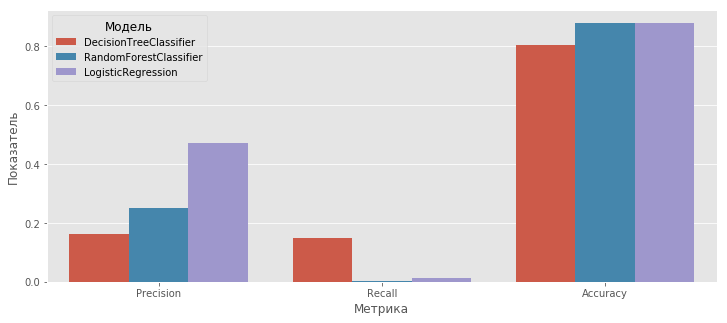

In [198]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
import seaborn as sns

a = pd.DataFrame({'Модель': ['DecisionTreeClassifier', 'DecisionTreeClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RandomForestClassifier', 'RandomForestClassifier', 'LogisticRegression', 'LogisticRegression', 'LogisticRegression'],
                  'Метрика': ['Precision', 'Recall', 'Accuracy', 'Precision', 'Recall', 'Accuracy', 'Precision', 'Recall', 'Accuracy'],
                  'Показатель': [psDTC, rsDTC, asDTC, psLR, rsLR, asLR, psRFC, rsRFC, asRFC]})

g = sns.barplot(data=a, x='Метрика', y='Показатель',
                hue='Модель', ci=None)

0.521060916350049
0.6446035766574151
0.6063552585486783


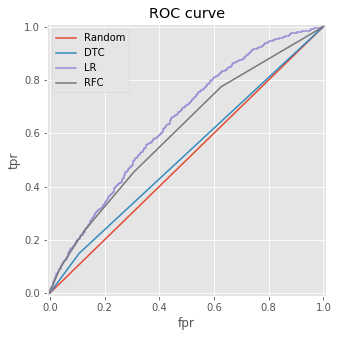

In [228]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fprDTC, tprDTC, thresholdsDTC = roc_curve(y_train_test, predict_probaDTC[:,1])
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1])
plt.plot(fprDTC, tprDTC)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

fprLR, tprLR, thresholdsLR = roc_curve(y_train_test, predict_probaLR[:,1])
plt.plot(fprLR, tprLR)

fprRFC, tprRFC, thresholdsRFC = roc_curve(y_train_test, predict_probaRFC[:,1])
plt.plot(fprRFC, tprRFC)

plt.legend(['Random','DTC', 'LR', 'RFC'])

print(roc_auc_score(y_train_test, predict_probaDTC[:,1]))
print(roc_auc_score(y_train_test, predict_probaLR[:,1]))
print(roc_auc_score(y_train_test, predict_probaRFC[:,1]))

In [231]:


from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
from numpy import mean
from sklearn.model_selection import cross_val_score

dtc = DecisionTreeClassifier()
dtc_roc_auc = cross_val_score(
    dtc,
    X_train_test,
    y_train_test,
    scoring='roc_auc',
    cv=10
)

lr = LogisticRegression()
lr_roc_auc = cross_val_score(
    lr,
    X_train_test,
    y_train_test,
    scoring='roc_auc',
    cv=10
)

rfc = RandomForestClassifier()
rfc_roc_auc = cross_val_score(
    rfc,
    X_train_test,
    y_train_test,
    scoring='roc_auc',
    cv=10
)

print(mean(dtc_roc_auc))
print(mean(lr_roc_auc))
print(mean(rfc_roc_auc))

0.5267362929498635
0.6631746790386572
0.5975539714671129


In [234]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

#predict = 
## Your Code Here
predictProbaLRTest = modelLR.predict_proba(X_test)

0.6250553191489361


(-0.01, 1.01)

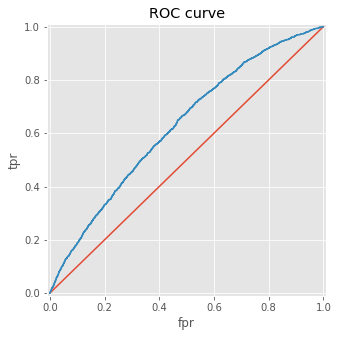

In [237]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
print(roc_auc_score(y_test, predictProbaLRTest[:,1]))

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fprLR_test, tprLR_test, thresholdsDTC = roc_curve(y_test, predictProbaLRTest[:,1])
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1])
plt.plot(fprLR_test, tprLR_test)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)